In [53]:
import pandas as pd
import pyreadr
import statsmodels.api as sm
import seaborn as sns

# Exercise 3.1

In [24]:
catheter_r = pyreadr.read_r('../Data/catheter.rda')
catheter_df = catheter_r['catheter']
catheter_df

,height,weight,catlength
0,107.4,18.0,37.0
1,159.4,42.1,49.5
2,94.1,16.0,34.5
3,99.1,13.5,36.0
4,114.2,23.4,43.0
5,96.6,7.7,28.0
6,107.9,17.3,37.0
7,56.5,3.8,20.0
8,92.9,14.9,33.5
9,59.0,4.3,30.5


a)

In [25]:
x_height = sm.add_constant(catheter_df.height)
y = catheter_df.catlength

modelled_by_height = sm.OLS(y, x_height).fit()

modelled_by_height.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              catlength   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     34.73
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           0.000152
Time:                        21:59:07   Log-Likelihood:                -32.594
No. Observations:                  12   AIC:                             69.19
Df Residuals:                      10   BIC:                             70.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1271      4.247      2.855      0.017       2.664      21.590
height         0.2377      0.040      5.893      0.000       0.148       0.328
==============================================================================
Omnibus:                        0.408   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.815   Jarque-Bera (JB):                0.073
Skew:                          -0.165   Prob(JB):                        0.964
Kurtosis:                       2.806   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
x_weight = sm.add_constant(catheter_df.weight)
y = catheter_df.catlength

modelled_by_weight = sm.OLS(y, x_weight).fit()

modelled_by_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              catlength   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     39.86
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           8.75e-05
Time:                        21:59:07   Log-Likelihood:                -31.943
No. Observations:                  12   AIC:                             67.89
Df Residuals:                      10   BIC:                             68.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.6263      2.003     12.796      0.000      21.164      30.088
weight         0.6161      0.098      6.313      0.000       0.399       0.834
==============================================================================
Omnibus:                        2.618   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                0.500
Skew:                          -0.279   Prob(JB):                        0.779
Kurtosis:                       3.830   Cond. No.                         37.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Predictor Significance**

**For `modelled_by_height`:**
- **Height predictor**: p-value = 0.000 (< 0.05) → **Significant** ✓
- The height coefficient is 0.2377 with P>|t| = 0.000

**For `modelled_by_weight`:**
- **Weight predictor**: p-value = 0.000 (< 0.05) → **Significant** ✓
- The weight coefficient is 0.6161 with P>|t| = 0.000

Both predictors are highly significant in their respective models. Both p-values are well below the conventional significance level of 0.05, indicating strong evidence that both height and weight have a significant relationship with catheter length.

Additionally:
- The F-statistic for both models also shows very low p-values (0.000152 for height, 8.75e-05 for weight), confirming overall model significance
- Weight model has slightly higher R-squared (0.799 vs 0.776), suggesting it explains slightly more variance in catheter length than height alone

b)

In [27]:
x_height_and_weight = sm.add_constant(catheter_df[['height', 'weight']])
y = catheter_df.catlength

modelled_by_height_and_weight = sm.OLS(y, x_height_and_weight).fit()
modelled_by_height_and_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              catlength   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     18.65
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           0.000630
Time:                        21:59:07   Log-Likelihood:                -31.757
No. Observations:                  12   AIC:                             69.51
Df Residuals:                       9   BIC:                             70.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.0853      8.770      2.404      0.040       1.245      40.925
height         0.0768      0.144      0.533      0.607      -0.249       0.403
weight         0.4275      0.368      1.161      0.275      -0.405       1.260
==============================================================================
Omnibus:                        1.049   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.592   Jarque-Bera (JB):                0.029
Skew:                          -0.017   Prob(JB):                        0.986
Kurtosis:                       3.239   Cond. No.                         826.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Predictor Significance in Multiple Linear Regression**

**Individual Predictor Significance:**

**Height:**
- Coefficient: 0.0768
- p-value: 0.607 (> 0.05) → **NOT Significant** ✗
- 95% CI: [-0.249, 0.403] (includes zero)

**Weight:**
- Coefficient: 0.4275
- p-value: 0.275 (> 0.05) → **NOT Significant** ✗
- 95% CI: [-0.405, 1.260] (includes zero)

**Overall Model Significance:**

- **F-statistic**: 18.65 with p-value (= "Prob (F-statistic)") = 0.000630 (< 0.05) → **Model is Significant** ✓
- **R-squared**: 0.806 (80.6% of variance explained)
- **Adj. R-squared**: 0.762

**Key Interpretation:**

This is a classic case of **multicollinearity**!

**What's happening:**
1. **Overall model is significant** - height and weight together significantly predict catheter length
2. **Individual predictors are NOT significant** - neither appears significant when controlling for the other
3. **High condition number (826)** - indicates multicollinearity between height and weight

**Why this occurs:**

- Height and weight are highly correlated with each other
- When both are in the model, they "compete" to explain the same variance
- Each predictor's unique contribution (after accounting for the other) is not statistically significant
- Yet together, they explain substantial variance (R² = 0.806)

**Comparison Summary:**

| Model | Predictor(s) Significant? | R² |
| --- | --- | --- |
| Height only | ✓ Yes (p < 0.001) | 0.776 |
| Weight only | ✓ Yes (p < 0.001) | 0.799 |
| Height + Weight (MLR) | ✗ Neither (p > 0.05) | 0.806 |

**Conclusion:** The predictors are NOT individually significant in the multiple linear regression, likely due to multicollinearity between height and weight.


c) As seen in the summary output above, both predictors are insignificant:

- height: p-value = 0.697 which is not < 0.05
- weight: p-value = 0.275 which is not < 0.05

Is this a contradiction to the results obtained in the two simple linear regression models? The answer is no. In multiple linear regression, on the basis of the hypotheses tests we decide whether the predictor variable height is required when the value of the predictor weight is known. The answer is no and the same holds vice versa.

However, the gllobal F-test indicates that we need at least one of the two predictors:

- Prob (F-statistic) = 0.00063 which is < 0.05

**Conclusion:**

So we do not need to include both predictors simultaneously but
we need one of them. This situation occurs when the predictors are strongly
correlated. Due to the smaller p-value (= 0.275) we would prefer to include the predictor
weight in the regression model.

d)

In [33]:
height = 120
weight = 25

y_height_and_weight = modelled_by_height_and_weight.get_prediction([[1, height, weight]])
y_height = modelled_by_height.get_prediction([[1, height]])
y_weight = modelled_by_weight.get_prediction([[1, weight]])

summaries = []
for pred in [y_height_and_weight, y_height, y_weight]:
    summary = pred.summary_frame(alpha = 0.05).loc[0]
    summaries.append(summary)

pd.DataFrame(summaries, index = ['height_and_weight', 'height', 'weight'])

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
height_and_weight,40.990715,1.388277,37.850214,44.131217,31.539886,50.441545
height,40.656088,1.381543,37.577820,43.734357,31.208908,50.103269
weight,41.029545,1.335813,38.053167,44.005922,32.061623,49.997467


In practice, a prediction error of ± 2 cm would be acceptable. Do the data and
the models allow for a prediction of catlength that is sufficiently precise?

Neither one of the models fulfills this criteria because all of them have a observation confidence interval which is way bigger than 2cm (all of them are roughly [30, 50]).

# Exercise 3.2

In [35]:
savings_df = pd.read_csv('../Data/savings.csv')
savings_df

,Unnamed: 0,sr,pop15,pop75,dpi,ddpi
0,Australia,11.43,29.35,2.87,2329.68,2.87
1,Austria,12.07,23.32,4.41,1507.99,3.93
2,Belgium,13.17,23.80,4.43,2108.47,3.82
3,Bolivia,5.75,41.89,1.67,189.13,0.22
4,Brazil,12.88,42.19,0.83,728.47,4.56
5,Canada,8.79,31.72,2.85,2982.88,2.43
6,Chile,0.60,39.74,1.34,662.86,2.67
7,China,11.90,44.75,0.67,289.52,6.51
8,Colombia,4.98,46.64,1.06,276.65,3.08
9,Costa Rica,10.78,47.64,1.14,471.24,2.80


a)

In [38]:
x_sm = sm.add_constant(savings_df[['pop15', 'pop75', 'dpi', 'ddpi']])

model = sm.OLS(savings_df.sr, x_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sr   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     5.756
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           0.000790
Time:                        22:09:05   Log-Likelihood:                -135.10
No. Observations:                  50   AIC:                             280.2
Df Residuals:                      45   BIC:                             289.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5661      7.355      3.884      0.000      13.753      43.379
pop15         -0.4612      0.145     -3.189      0.003      -0.753      -0.170
pop75         -1.6915      1.084     -1.561      0.126      -3.874       0.491
dpi           -0.0003      0.001     -0.362      0.719      -0.002       0.002
ddpi           0.4097      0.196      2.088      0.042       0.015       0.805
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.493
Skew:                           0.241   Prob(JB):                        0.782
Kurtosis:                       3.064   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
import numpy as np
import matplotlib.pyplot as plt

import TMA_def as tma

def model_plot(x_true, y_true, model, x_label = None, y_label = None):
    plt.title('Model')
    plt.plot(x_true, model.fittedvalues, color='red')
    plt.scatter(x_true, y_true)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

def tma_plots(model, n_samp=1000):
    # Find the predicted values for the original design.
    y_hat = model.fittedvalues
    # Find the Residuals
    res = model.resid
    # Influence of the Residuals
    res_inf = model.get_influence()
    # Studentized residuals using variance from OLS
    res_standard = res_inf.resid_studentized_internal
    # Absolute square root Residuals:
    res_stand_sqrt = np.sqrt(np.abs(res_standard))
    # Cook's Distance and leverage:
    res_inf_cooks = res_inf.cooks_distance
    res_inf_leverage = res_inf.hat_matrix_diag

    """ Plots """
    # Create Figure and subplots
    fig = plt.figure(figsize = (14, 18))

    # First subplot Residuals vs Fitted values
    ax1 = fig.add_subplot(3, 3, 1)
    tma.plot_residuals(ax1, y_hat, res, title='Tukey-Anscombe plot - Residuals vs Fitted')
    ax4 = fig.add_subplot(3, 3, 4)
    tma.plot_residuals(ax4, y_hat, res, n_samp=n_samp, title='Tukey-Anscombe plot - Residuals vs Fitted')

    # Second subplot Q-Q Plot
    ax2 = fig.add_subplot(3, 3, 2)
    tma.plot_QQ(ax2, res_standard, title='Normal plot or Q-Q plot')
    ax5 = fig.add_subplot(3, 3, 5)
    tma.plot_QQ(ax5, res_standard, n_samp=n_samp, title='Normal plot or Q-Q plot')

    # Third subplot: Scale location
    ax3 = fig.add_subplot(3, 3, 3)
    tma.plot_scale_loc(ax3, y_hat, res_stand_sqrt, x_lab='Fitted values')
    ax6 = fig.add_subplot(3, 3, 6)
    tma.plot_scale_loc(ax6, y_hat, res_stand_sqrt, n_samp=n_samp, x_lab='Fitted values')

    # Fourth subplot: Cook's distance
    ax7 = fig.add_subplot(3, 3, 7)
    x_min, x_max = min(res_inf_leverage) - 0.005, max(res_inf_leverage) + 0.01
    y_min, y_max = min(res_standard) - 1, max(res_standard) + 1
    tma.plot_cooks(ax7, res_inf_leverage, res_standard, n_pred=1,
              x_lim=[x_min, x_max], y_lim=[y_min, y_max])

    # Lag-1-Plot
    ax8 = fig.add_subplot(3, 3, 8)
    res_t0 = res[:-1]
    res_t1 = res[1:]
    ax8.scatter(res_t0, res_t1)
    ax8.set_xlabel('Residual r(t)')
    ax8.set_ylabel('Residual r(t+1)')
    ax8.set_title('Lag-1-Plot')

    # Residual vs Observation Plot
    ax9 = fig.add_subplot(3, 3, 9)
    res_len = len(res)
    ax9.plot(range(res_len), res)
    ax9.set_xlabel('Observation')
    ax9.set_ylabel('Residual')
    ax9.set_title('Residual Observations')

    # Show plot
    # plt.tight_layout()
    plt.show()

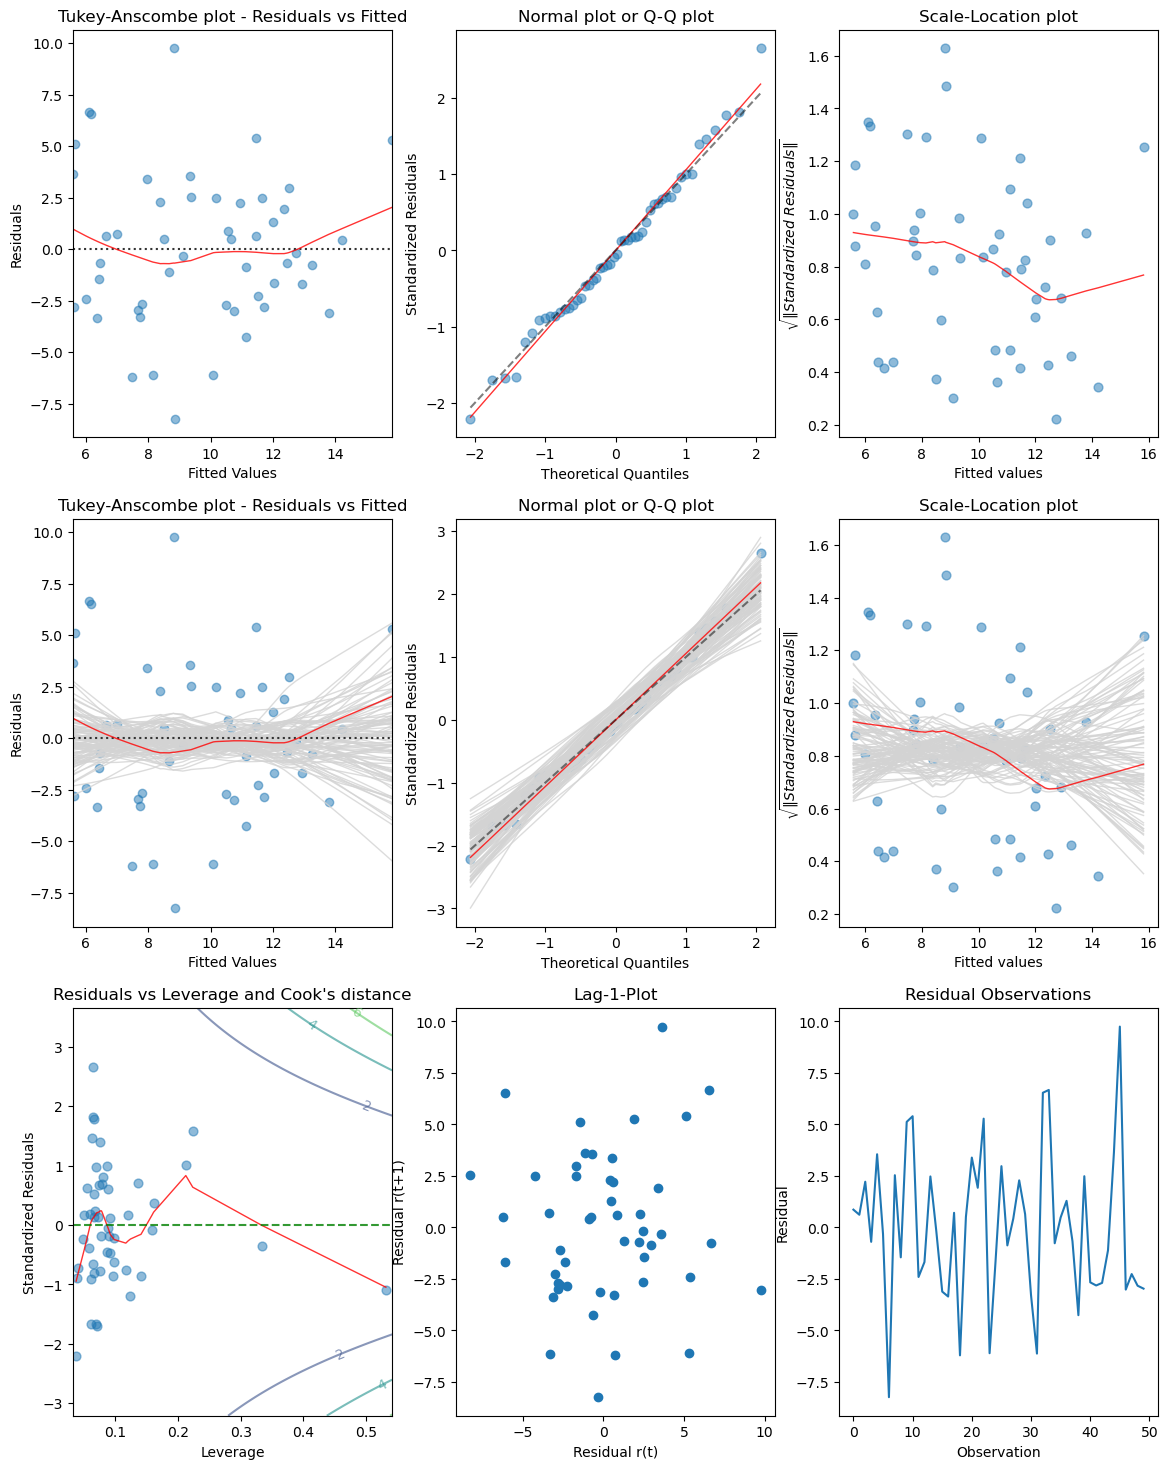

In [44]:
# model_plot(model)
tma_plots(model, n_samp=100)

**Residual Analysis:**

1. For the expected value of all $\epsilon_i$ we have $E[\epsilon_i] = 0$:
    - ✅ The Tukey-Anscompe plot (upper-left) shows that the residuals are contained within the grey smoothing lines. We conclude that the expected value of all $\epsilon_i$ is zero.
2. The error terms $\epsilon_i$ all have the same constant variance $Var[\epsilon_i] = \sigma^2$
    - ✅ The Scale-Location Plot (upper-right) tends to decrease, but it is contained within the grey band of simulated smoothing curves. We conclude that the variances of the error terms $\epsilon_i$ are constant.
3. The error terms $\epsilon_i$ are normally distributed
    - ✅ The data points are contained in the grey band of the simulated curves in the Q-Q plot (upper-middle). We therefore interpret the error terms $\epsilon_i$ as normally distributed.
4. The error terms $\epsilon_i$ are independent
    - ✅ There is no specific notion of time in the data. Therefore we assume that the error terms $\epsilon_i$ are independent.

**Conclusion:** All assumptions of a linear regression are fulfilled.

b)

In [57]:
savings_sorted_df = savings_df.sort_values('sr', ascending=False)
savings_sorted_df

,Unnamed: 0,sr,pop15,pop75,dpi,ddpi,sr_sort
22,Japan,21.10,27.01,1.91,1257.28,8.21,47
45,Zambia,18.56,45.25,0.56,138.33,5.14,27
10,Denmark,16.85,24.42,3.93,2496.53,3.99,40
25,Malta,15.48,32.54,2.47,601.05,8.12,28
27,Netherlands,14.65,24.71,3.25,1740.70,7.66,9
21,Italy,14.28,24.52,3.48,1390.00,3.54,44
39,Switzerland,14.13,23.49,3.73,2630.96,2.70,33
36,South Rhodesia,13.30,31.92,1.52,250.96,2.00,14
2,Belgium,13.17,23.80,4.43,2108.47,3.82,31
4,Brazil,12.88,42.19,0.83,728.47,4.56,16


In [65]:
savings_sorted_df['rest'] = 'Other'
country_iloc = savings_sorted_df.columns.get_loc('rest')

for i in range(3):
    savings_sorted_df.iloc[i, country_iloc] = savings_sorted_df.iloc[i, 0]

savings_sorted_df

,Unnamed: 0,sr,pop15,pop75,dpi,ddpi,sr_sort,country,rest
22,Japan,21.10,27.01,1.91,1257.28,8.21,47,Japan,Japan
45,Zambia,18.56,45.25,0.56,138.33,5.14,27,Zambia,Zambia
10,Denmark,16.85,24.42,3.93,2496.53,3.99,40,Denmark,Denmark
25,Malta,15.48,32.54,2.47,601.05,8.12,28,Other,Other
27,Netherlands,14.65,24.71,3.25,1740.70,7.66,9,Other,Other
21,Italy,14.28,24.52,3.48,1390.00,3.54,44,Other,Other
39,Switzerland,14.13,23.49,3.73,2630.96,2.70,33,Other,Other
36,South Rhodesia,13.30,31.92,1.52,250.96,2.00,14,Other,Other
2,Belgium,13.17,23.80,4.43,2108.47,3.82,31,Other,Other
4,Brazil,12.88,42.19,0.83,728.47,4.56,16,Other,Other


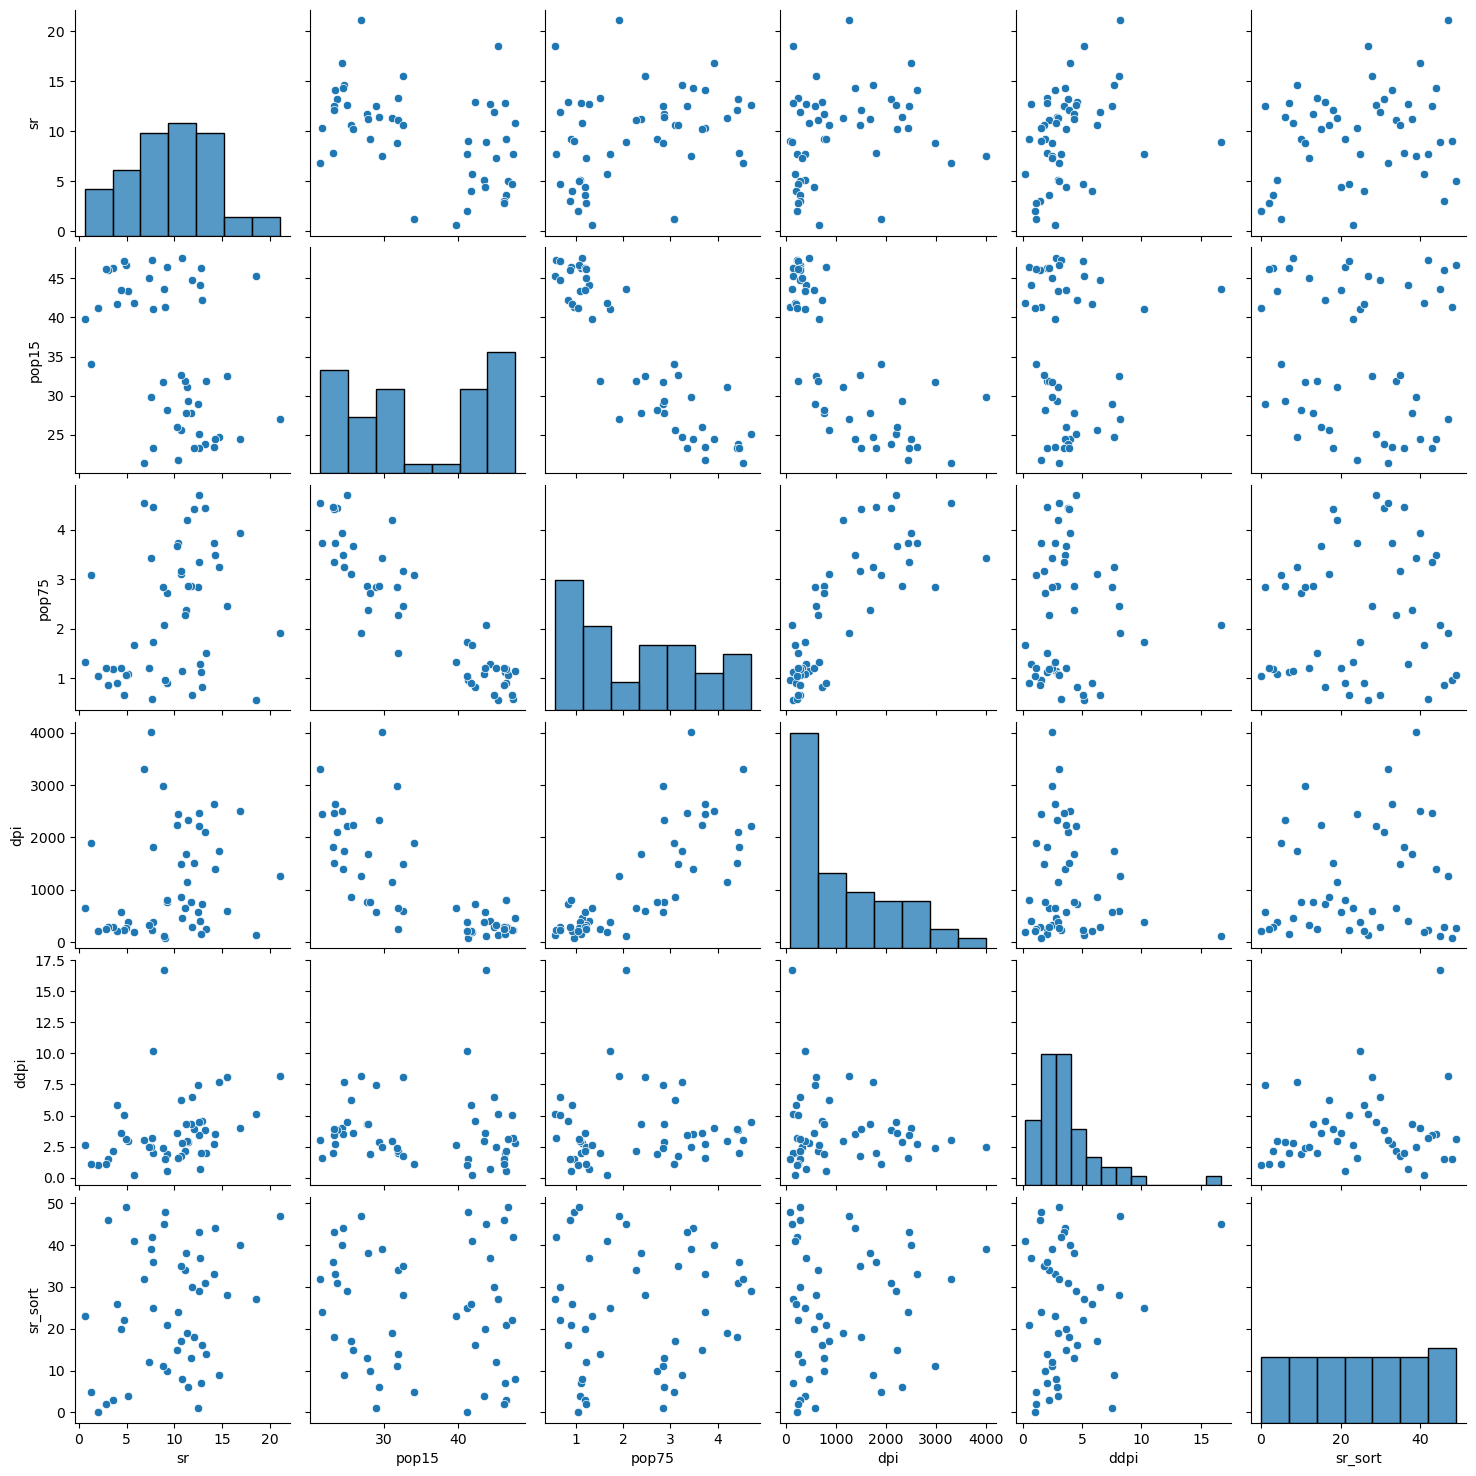

In [66]:
sns.pairplot(savings_sorted_df)